# CROP PRODUCTION ANALYSIS IN INDIA

Problem Statement:

The Agriculture business domain, as a vital part of the overall supply chain, is
expected to highly evolve in the upcoming years via the developments, which are
taking place on the side of the Future Internet. This paper presents a novel
Business-to-Business collaboration platform from the agri-food sector perspective,
which aims to facilitate the collaboration of numerous stakeholders belonging to
associated business domains, in an effective and flexible manner.
This dataset provides a huge amount of information on crop production in India
ranging from several years. Based on the Information the ultimate goal would be to
predict crop production and find important insights highlighting key indicators and
metrics that influence crop production.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(color_codes= True)
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [4]:
crop = pd.read_csv('/content/Crop Production data.csv')
crop.head(5)

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [5]:
crop.describe()

,Crop_Year,Area,Production
count,246091.000000,2.460910e+05,2.423610e+05
mean,2005.643018,1.200282e+04,5.825034e+05
std,4.952164,5.052340e+04,1.706581e+07
min,1997.000000,4.000000e-02,0.000000e+00
25%,2002.000000,8.000000e+01,8.800000e+01
50%,2006.000000,5.820000e+02,7.290000e+02
75%,2010.000000,4.392000e+03,7.023000e+03
max,2015.000000,8.580100e+06,1.250800e+09


In [6]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


In [7]:
crop.shape

(246091, 7)

In [8]:
crop.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production'],
      dtype='object')

In [9]:
# Rectify the null values if any.

crop.isnull().sum()


,0
State_Name,0
District_Name,0
Crop_Year,0
Season,0
Crop,0
Area,0
Production,3730


In [10]:
crop.dropna(inplace=True)

In [11]:
crop.isnull().sum()

,0
State_Name,0
District_Name,0
Crop_Year,0
Season,0
Crop,0
Area,0
Production,0


In [5]:
# Count the crops state wise

crop.State_Name.value_counts()

,count
State_Name,
Uttar Pradesh,33306
Madhya Pradesh,22943
Karnataka,21122
Bihar,18885
Assam,14628
Odisha,13575
Tamil Nadu,13547
Maharashtra,12628
Rajasthan,12514


In [6]:
# Count the district wise crops values

crop.District_Name.value_counts()

,count
District_Name,
BIJAPUR,945
TUMKUR,936
BELGAUM,925
HASSAN,895
BELLARY,887
...,...
HYDERABAD,8
KHUNTI,6
RAMGARH,6


# DATA VISUALIZATIONS

CROP PRODUCTION TRENDS OVER TIME

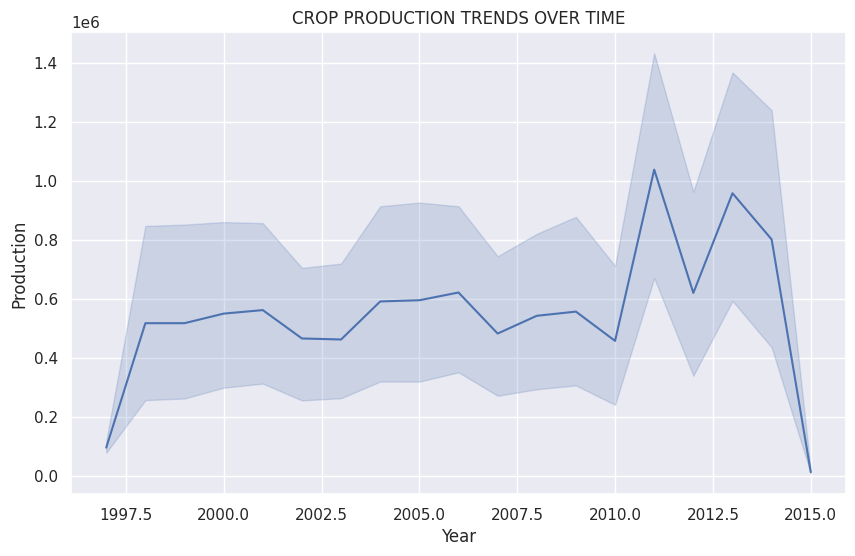

In [7]:
plt.figure(figsize=(10,6))
sns.lineplot( data = crop, x = 'Crop_Year', y = 'Production')
plt.title('CROP PRODUCTION TRENDS OVER TIME')
plt.xlabel('Year')
plt.ylabel('Production')
plt.grid(True)
plt.show()

TOP 10 CROPS BY TOTAL PRODUCTION

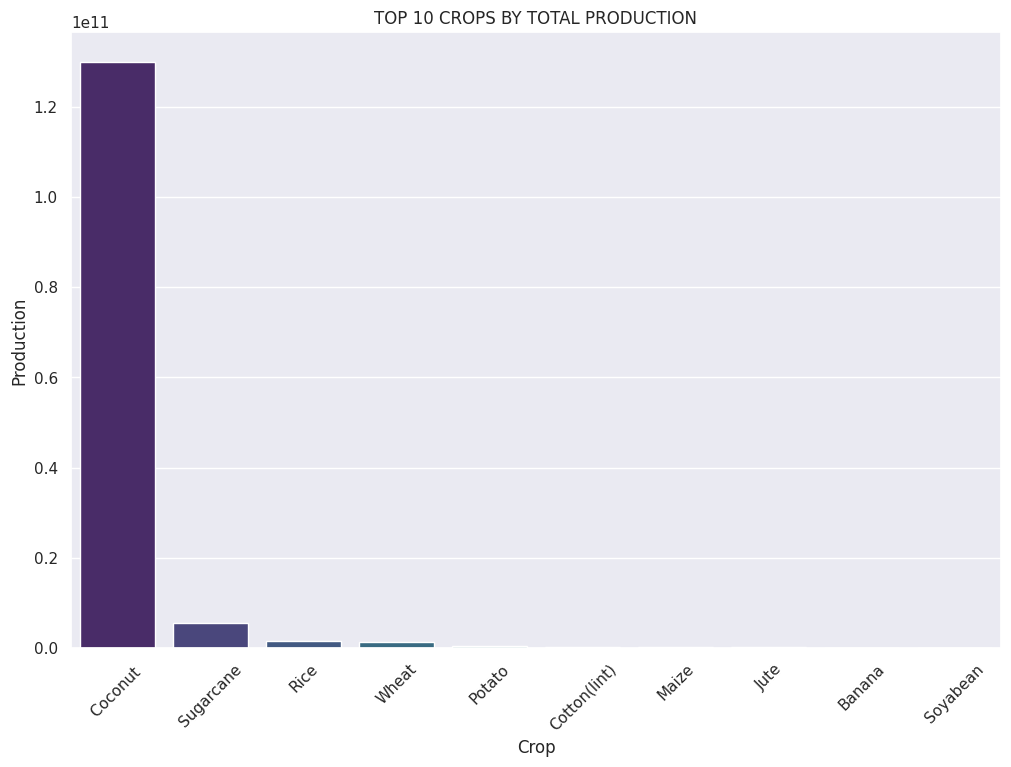

In [10]:
top_crops= crop.groupby('Crop')['Production'].sum().sort_values(ascending= False).head(10)
plt.figure(figsize=(12,8))
sns.barplot(x= top_crops.index, y= top_crops.values, palette= 'viridis')
plt.title('TOP 10 CROPS BY TOTAL PRODUCTION')
plt.xlabel('Crop')
plt.ylabel('Production')
plt.xticks(rotation = 45)
plt.show()

CROP PRODUCTION VS YEAR

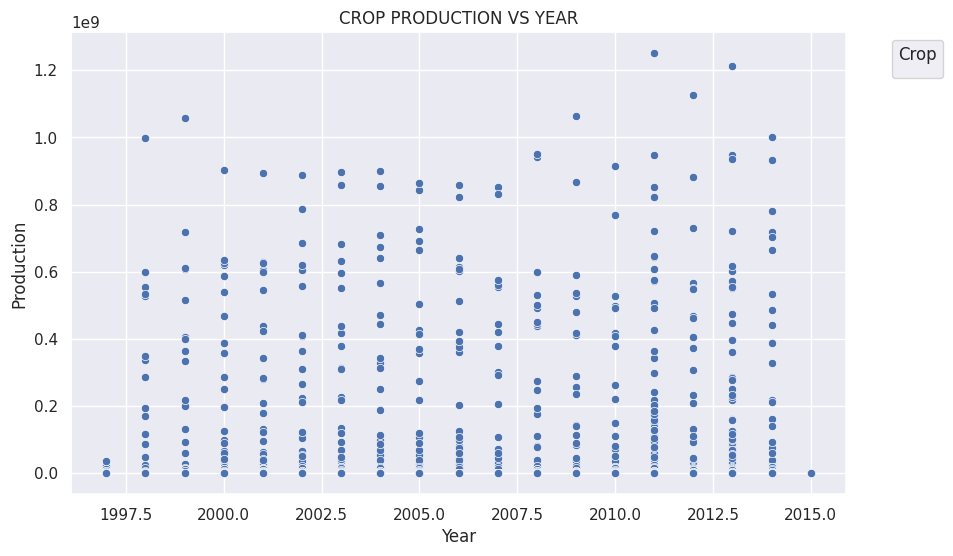

In [11]:
plt.figure(figsize=(10,6))
sns.scatterplot(data = crop, x ='Crop_Year', y = 'Production')
plt.title('CROP PRODUCTION VS YEAR')
plt.xlabel('Year')
plt.ylabel('Production')
plt.legend(title = 'Crop', bbox_to_anchor = (1.05,1),loc= 'upper left')
plt.grid(True)
plt.show()

SEASONAL CROP PRODUCTION

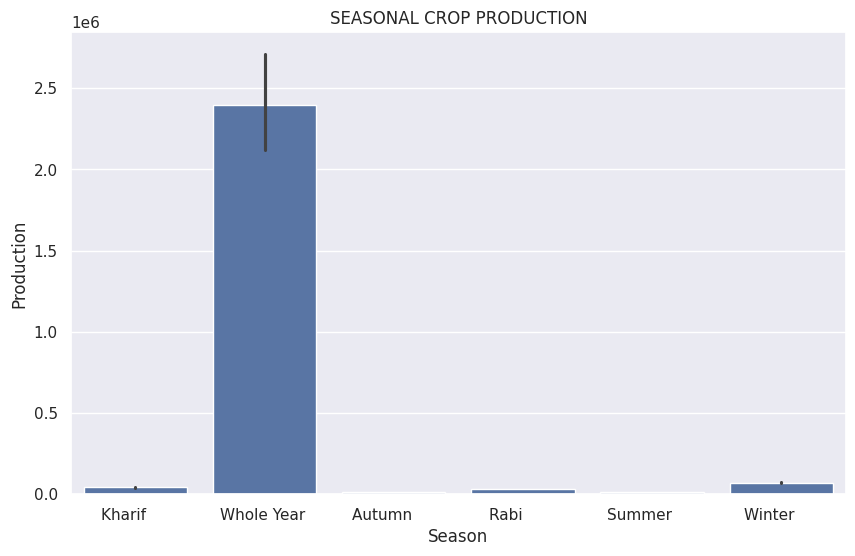

In [13]:
plt.figure(figsize=(10,6))
sns.barplot(data = crop, x = 'Season', y = 'Production')
plt.title('SEASONAL CROP PRODUCTION')
plt.xlabel('Season')
plt.ylabel('Production')
plt.show()

TOTAL PRODUCTION BY STATE

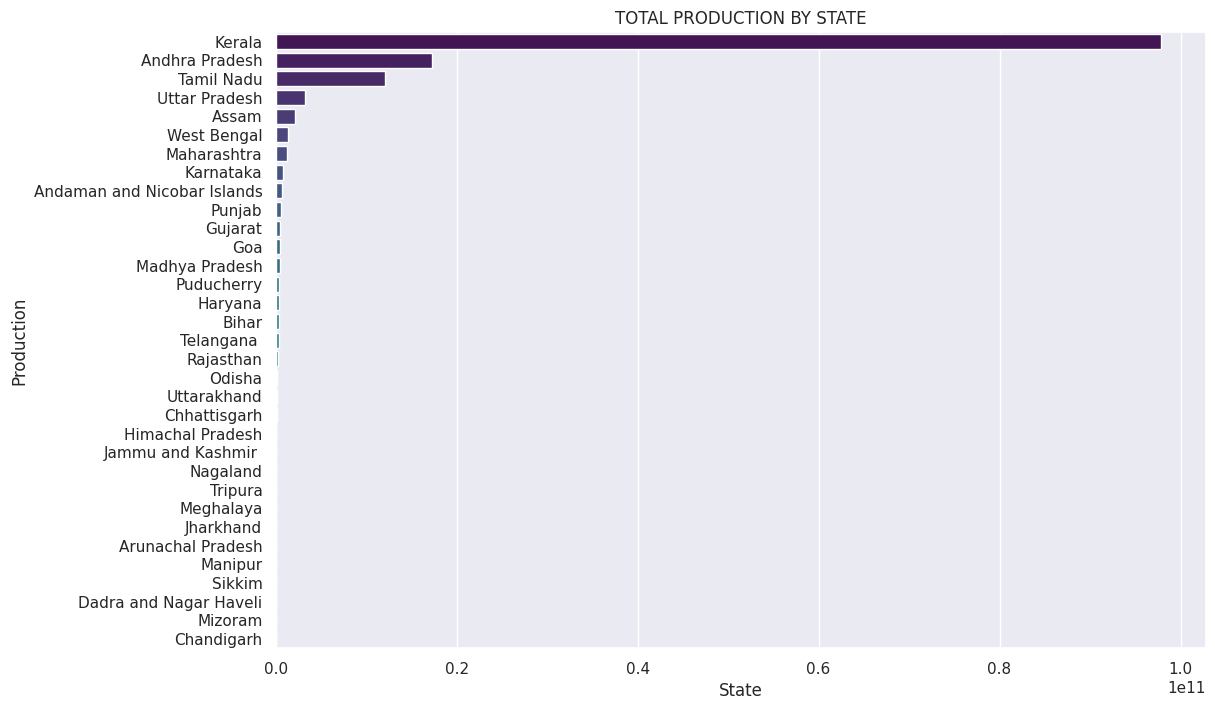

In [15]:
state_production = crop.groupby('State_Name')['Production'].sum().sort_values(ascending = False )
plt.figure(figsize=(12,8))
sns.barplot(x= state_production.values, y= state_production.index, palette= 'viridis')
plt.title('TOTAL PRODUCTION BY STATE')
plt.xlabel('State')
plt.ylabel('Production')
plt.show()

AREA VS PRODUCTION BY CROP

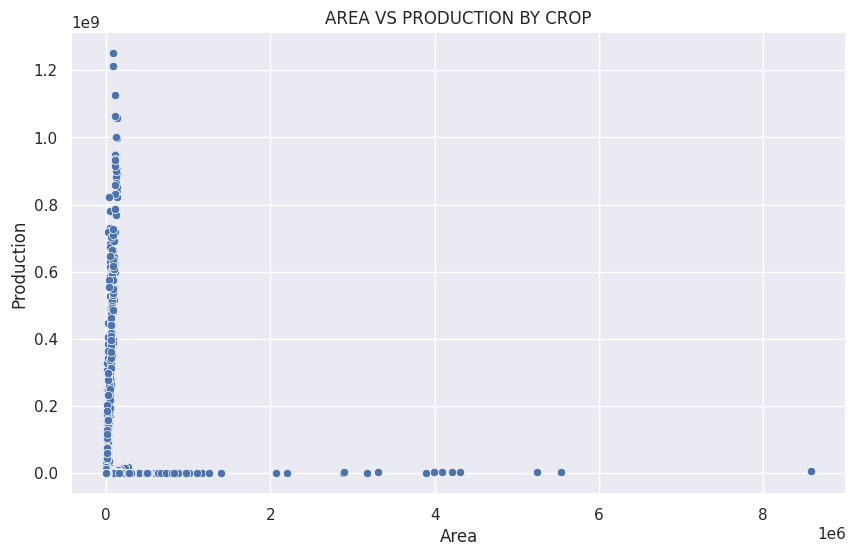

In [16]:
plt.figure(figsize=(10,6))
sns.scatterplot(data = crop, x = 'Area', y = 'Production')
plt.title('AREA VS PRODUCTION BY CROP')
plt.xlabel('Area')
plt.ylabel('Production')
plt.grid(True)
plt.show()

CUMULATIVE PRODUCTION BY SEASON OVER TIME

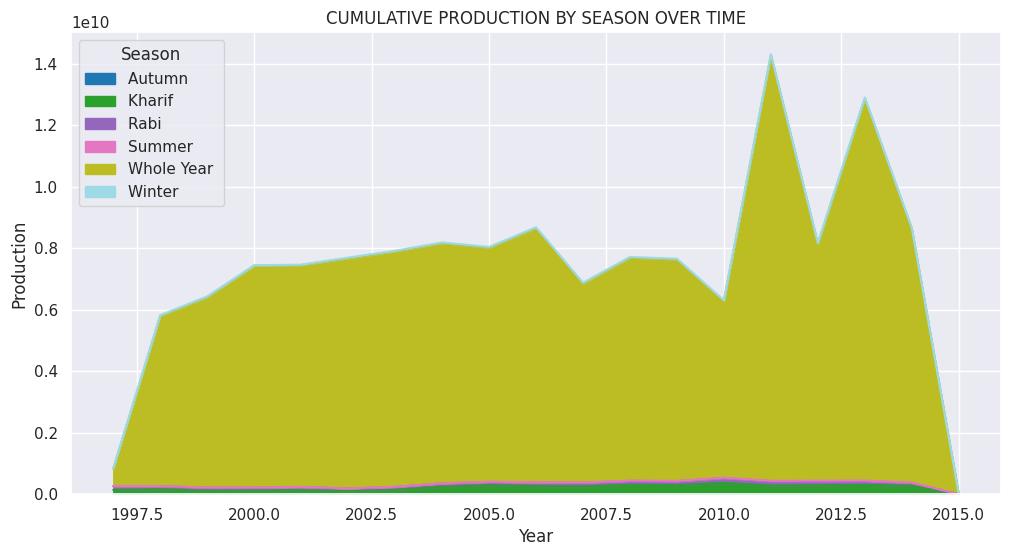

In [17]:
df_area = crop.groupby(['Crop_Year', 'Season'])['Production'].sum().unstack().fillna(0)
df_area.plot(kind='area', stacked=True, figsize=(12,6), colormap= 'tab20')
plt.title('CUMULATIVE PRODUCTION BY SEASON OVER TIME')
plt.xlabel('Year')
plt.ylabel('Production')
plt.show()


HEATMAP OF PRODUCTION BY SEASON AND YEAR

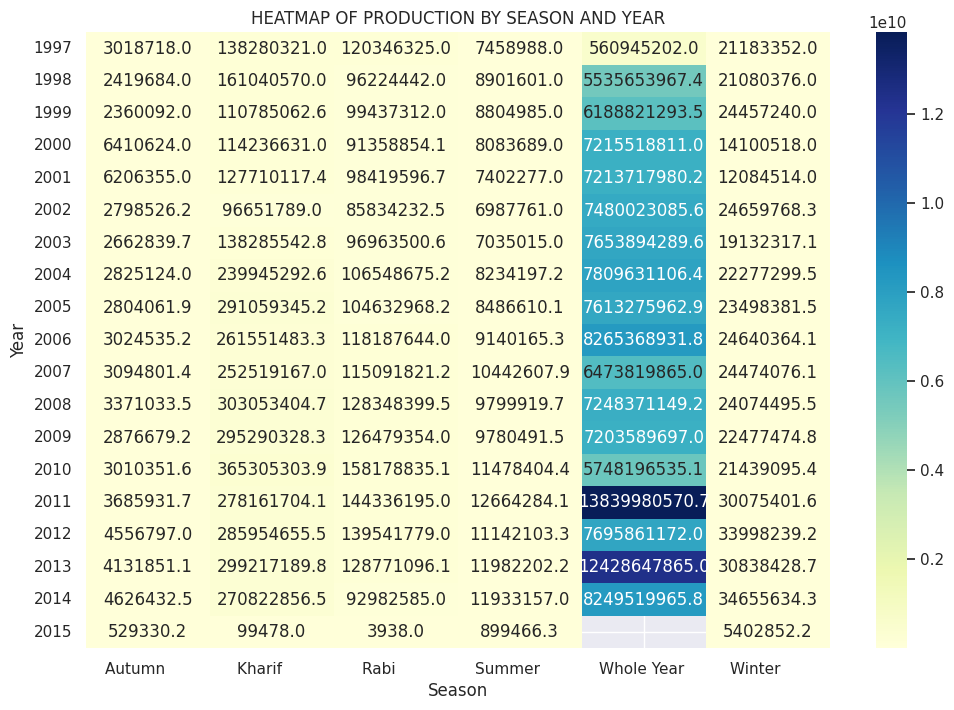

In [18]:
season_pivot = crop.pivot_table(index='Crop_Year', columns='Season', values='Production', aggfunc='sum')
plt.figure(figsize=(12,8))
sns.heatmap(season_pivot, annot =True , fmt= '.1f', cmap = 'YlGnBu')
plt.title('HEATMAP OF PRODUCTION BY SEASON AND YEAR')
plt.xlabel('Season')
plt.ylabel('Year')
plt.show()

DISTRIBUTION OF PRODUCTION BY CROP

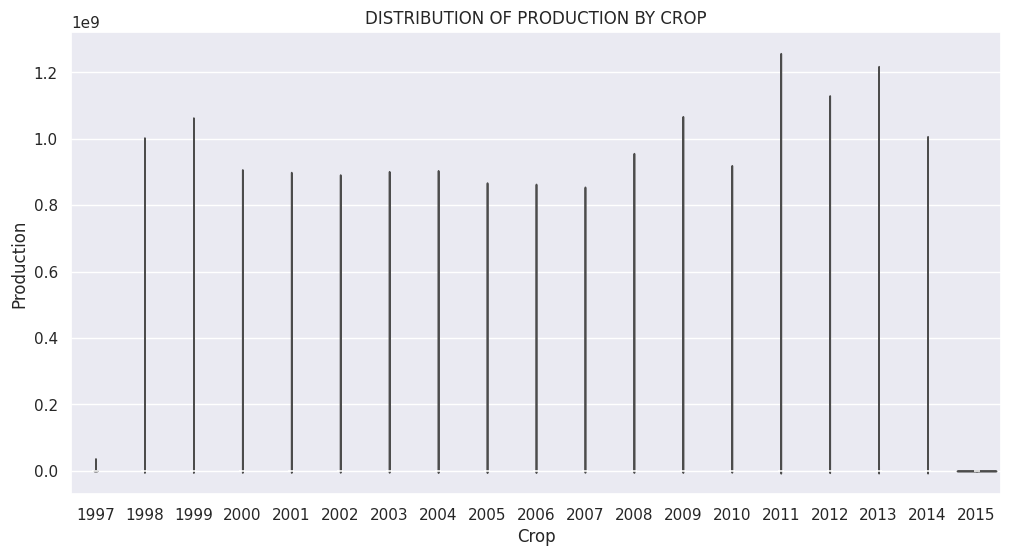

In [23]:
plt.figure(figsize = (12,6))
sns.violinplot(x = 'Crop_Year', y = 'Production', data = crop)
plt.title('DISTRIBUTION OF PRODUCTION BY CROP')
plt.xlabel('Crop')
plt.ylabel('Production')
plt.show()


HEXBIN PLOT OF AREA VS PRODUCTION

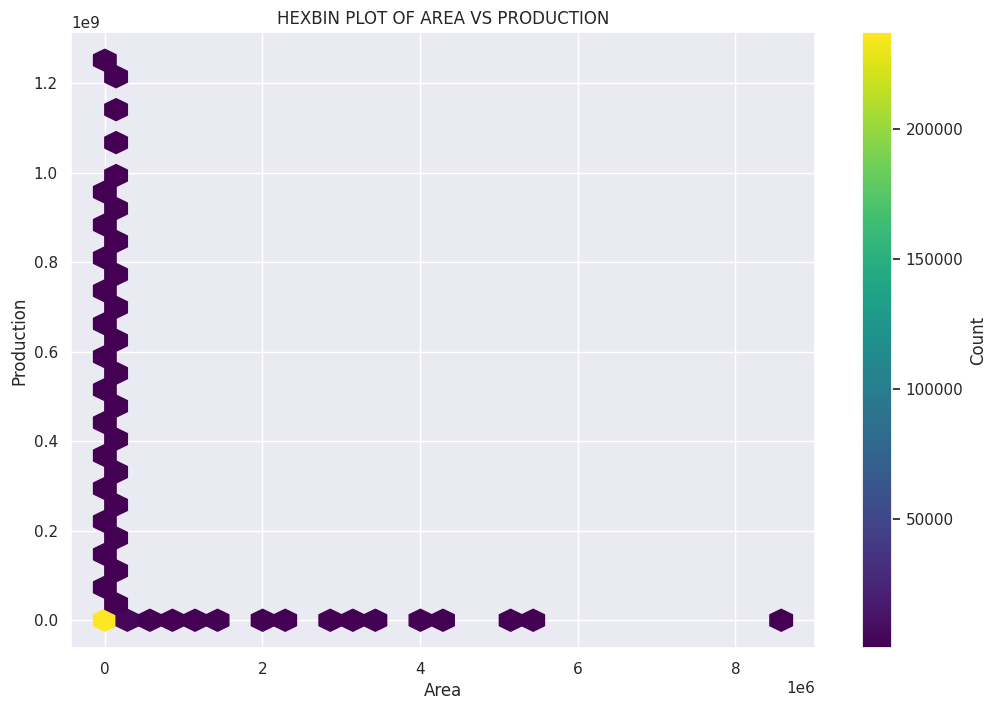

In [24]:
plt.figure(figsize=(12,8))
plt.hexbin(crop['Area'], crop['Production'], gridsize= 30, cmap= 'viridis', mincnt = 1)
plt.colorbar(label = 'Count')
plt.title('HEXBIN PLOT OF AREA VS PRODUCTION')
plt.xlabel('Area')
plt.ylabel('Production')
plt.show()

OVERALL CROPS VS PRODUCTION

Text(0.5, 1.0, 'OVERALL CROPS VS PRODUCTION')

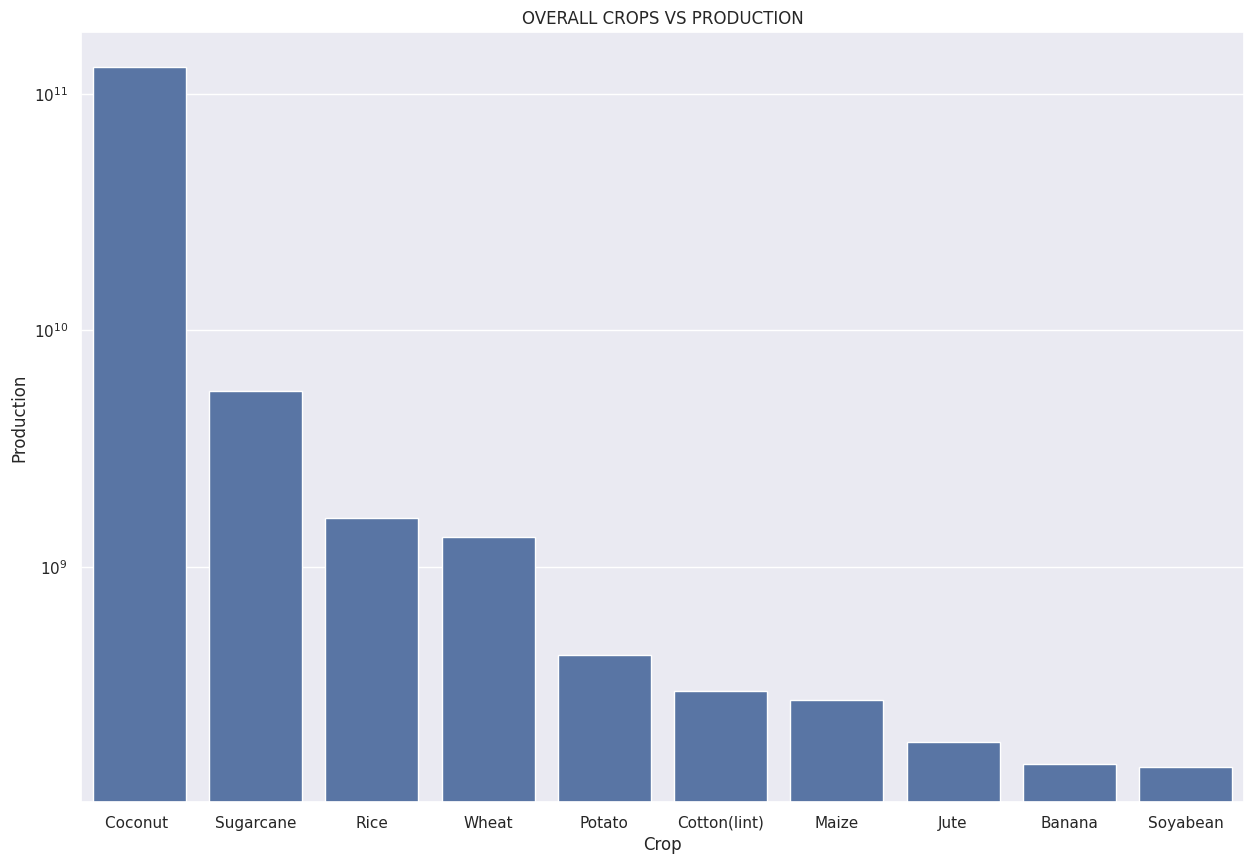

In [26]:
crop = crop.groupby(by = 'Crop')['Production'].sum().reset_index().sort_values(by = 'Production', ascending= False).head(10)
crop
fig,ax = plt.subplots(figsize = (15,10))
sns.barplot(x= crop.Crop, y= crop.Production )
plt.yscale('log')
plt.title('OVERALL CROPS VS PRODUCTION')
